In [1]:
import numpy as np
import pyvista as pv
from pathlib import Path
from PIL import Image
from hydrogen_plotting import (get_wavefunction_contour_mesh, plot_contour_mesh,
                               get_wavefunction_volume_mesh, plot_glyphs_grid,
                               get_sph_harm_mesh, plot_sph_harm_mesh)

In [5]:
(n, l, m) = (5, 3, 1)

In [3]:
n_steps=151
min_prob = 0.6
max_prob = 0.6
num_prob = 1
prob_enclosed_list = np.linspace(min_prob, max_prob, num_prob)
contour_mesh = get_wavefunction_contour_mesh(n, l, m, n_steps=n_steps,
                                             prob_enclosed_list=prob_enclosed_list,
                                             real_version=False,
                                             clip=True,
                                             clip_axes='xyz',
                                             map_opacity=False)

p = plot_contour_mesh(contour_mesh, smooth_shading=True)

In [6]:
n_steps=71
glyphs_grid = get_wavefunction_volume_mesh(n, l, m, n_steps=n_steps,
                                           real_version=True)

p = plot_glyphs_grid(glyphs_grid)

1 0 0


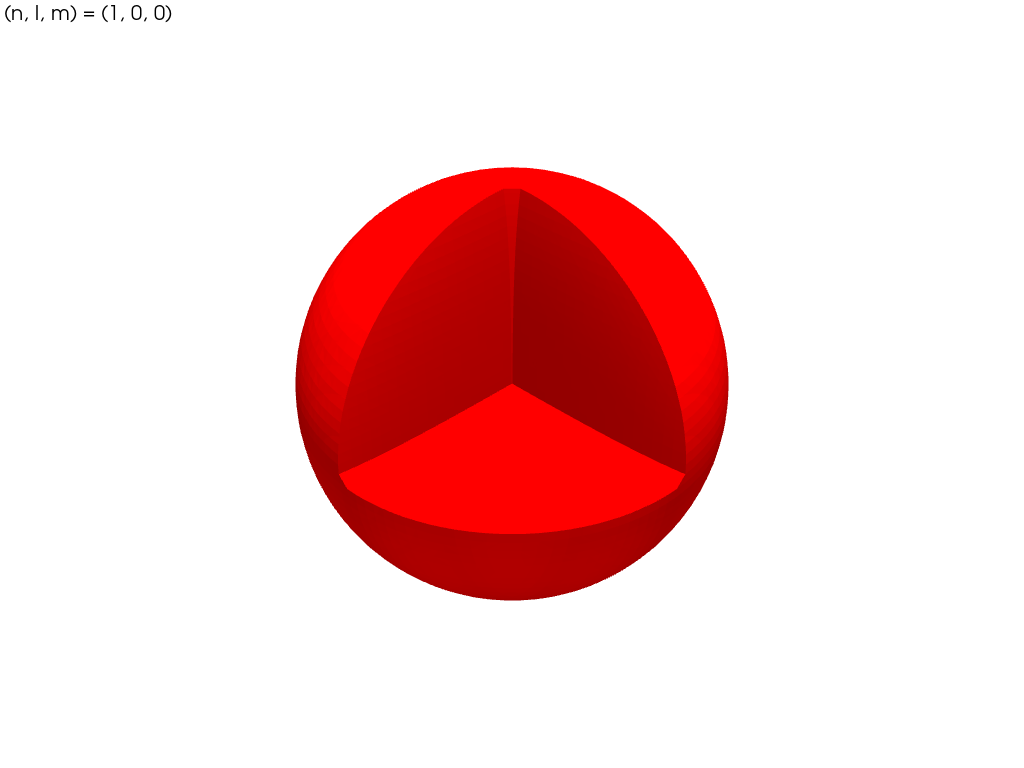

2 0 0
2 1 -1
2 1 0
2 1 1


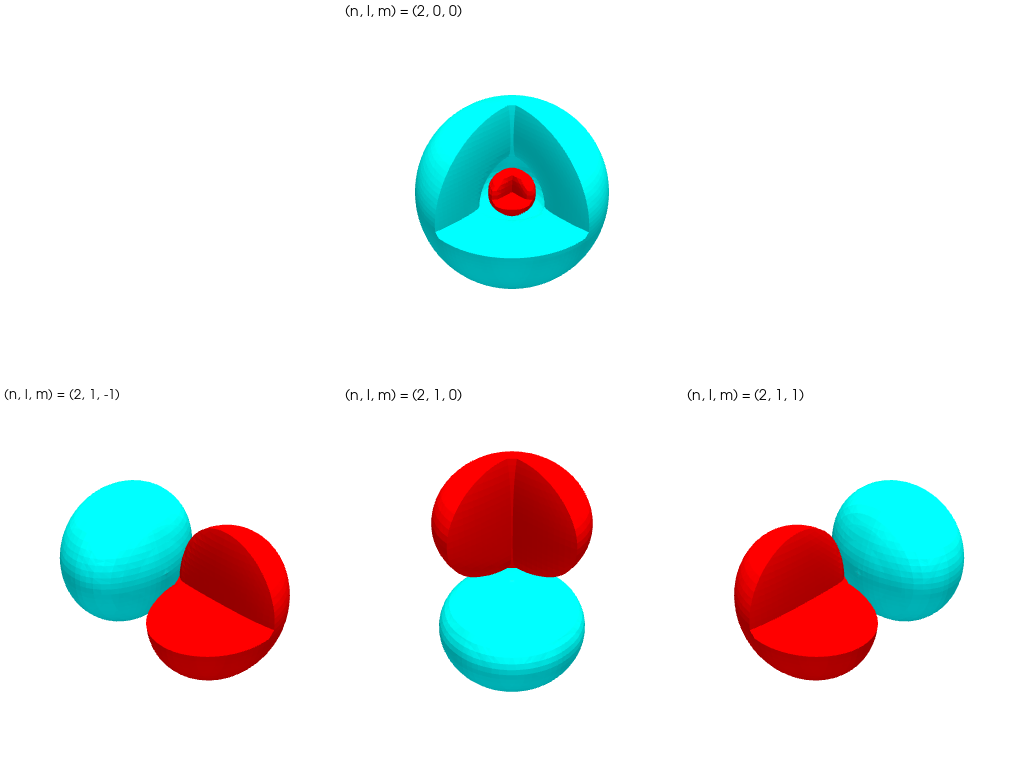

In [3]:
n_max = 2
prob_enclosed_list = np.linspace(0.6, 0.6, 1)
n_steps = 101
for n in range(1, n_max + 1):
    lmax = n - 1
    plotter = pv.Plotter(shape=(lmax + 1, 2 * lmax + 1), 
                         border=False, notebook=True,
                         off_screen=False)

    for l in range(0, lmax + 1):
        for m in range(-l, l+1):
            print(n, l, m)
            plotter.subplot(l, m + lmax)    

            contour_mesh = get_wavefunction_contour_mesh(n, l, m, n_steps=n_steps,
                                                         prob_enclosed_list=prob_enclosed_list,
                                                         real_version=True,
                                                         clip=True,
                                                         map_opacity=False)
            plot_contour_mesh(contour_mesh, show=False, plotter=plotter, show_grid=False)
            plotter.add_text(f'(n, l, m) = ({n}, {l}, {m})', font_size=9)
    plotter.show(interactive=False, auto_close=True, jupyter_backend='static')

In [4]:
(l, m) = (3, 1)
sph_harm_mesh = get_sph_harm_mesh(l, m, n_steps=51, real_version=False, radius_from_mag=True)
p = plot_sph_harm_mesh(sph_harm_mesh, show_grid=False)

In [2]:
name = 'sph_harm_complex_radial_mag'
frames_dir = Path(Path.cwd(), f'frames_{name}')
frames_dir.mkdir(exist_ok=True, parents=True)
output_name = f'{name}.gif'
real_version = False
radius_from_mag = True


n_steps=101
lmax = 3
plotter = pv.Plotter(shape=(lmax + 1, 2 * lmax + 1), 
                     border=False, notebook=False,
                     window_size=([2048, 1536]),
                     off_screen=False)

for l in range(0, lmax + 1):
    for m in range(-l, l+1):
        plotter.subplot(l, m + lmax)        
        sph_harm_mesh = get_sph_harm_mesh(l, m, n_steps=101, 
                                          real_version=real_version, 
                                          radius_from_mag=radius_from_mag)
        plot_sph_harm_mesh(sph_harm_mesh, show=False, plotter=plotter)
        plotter.add_text(f'(l, m) = ({l}, {m})', font_size=10)

plotter.show(auto_close=True, interactive=True)
# r = 6
# theta = np.pi / 3
# num_frames = 20
# phi_array = np.linspace(0, 2 * np.pi, num_frames, endpoint=False)

# # plotter.open_movie('testtest.mp4', framerate=framerate)

# for phi in phi_array:
#     file_name = f'phi_{phi:.4f}.png'
#     file_path = Path(frames_dir, file_name)
#     print(phi)
#     x = r * np.sin(theta) * np.cos(phi)
#     y = r * np.sin(theta) * np.sin(phi)
#     z = r * np.cos(theta)
#     new_position = (x, y, z)

#     for l in range(0, lmax + 1):
#         for m in range(-lmax, lmax+1):
#             plotter.subplot(l, m + lmax)        
#             plotter.camera.position = new_position
#     plotter.render()
#     plotter.screenshot(filename=file_path)
# plotter.close()

# frames_paths = frames_dir.glob('*.png')
# img, *imgs = [Image.open(f) for f in frames_paths]
# img.save(fp=output_name, format='GIF', append_images=imgs,
#          save_all=True, duration=100, loop=0)

In [29]:
from scipy.special import sph_harm
from hydrogen_plotting import complex_array_to_rgb, real_sph_harm
import matplotlib.pyplot as plt

0 0
1 -1
1 0
1 1
2 -2
2 -1
2 0
2 1
2 2
3 -3
3 -2
3 -1
3 0
3 1
3 2
3 3
4 -4
4 -3
4 -2
4 -1
4 0
4 1
4 2
4 3
4 4
5 -5
5 -4
5 -3
5 -2
5 -1
5 0
5 1
5 2
5 3
5 4
5 5
6 -6
6 -5
6 -4
6 -3
6 -2
6 -1
6 0
6 1
6 2
6 3
6 4
6 5
6 6
7 -7
7 -6
7 -5
7 -4
7 -3
7 -2
7 -1
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
8 -8
8 -7
8 -6
8 -5
8 -4
8 -3
8 -2
8 -1
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
9 -9
9 -8
9 -7
9 -6
9 -5
9 -4
9 -3
9 -2
9 -1
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
10 -10
10 -9
10 -8
10 -7
10 -6
10 -5
10 -4
10 -3
10 -2
10 -1
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
saving
saved


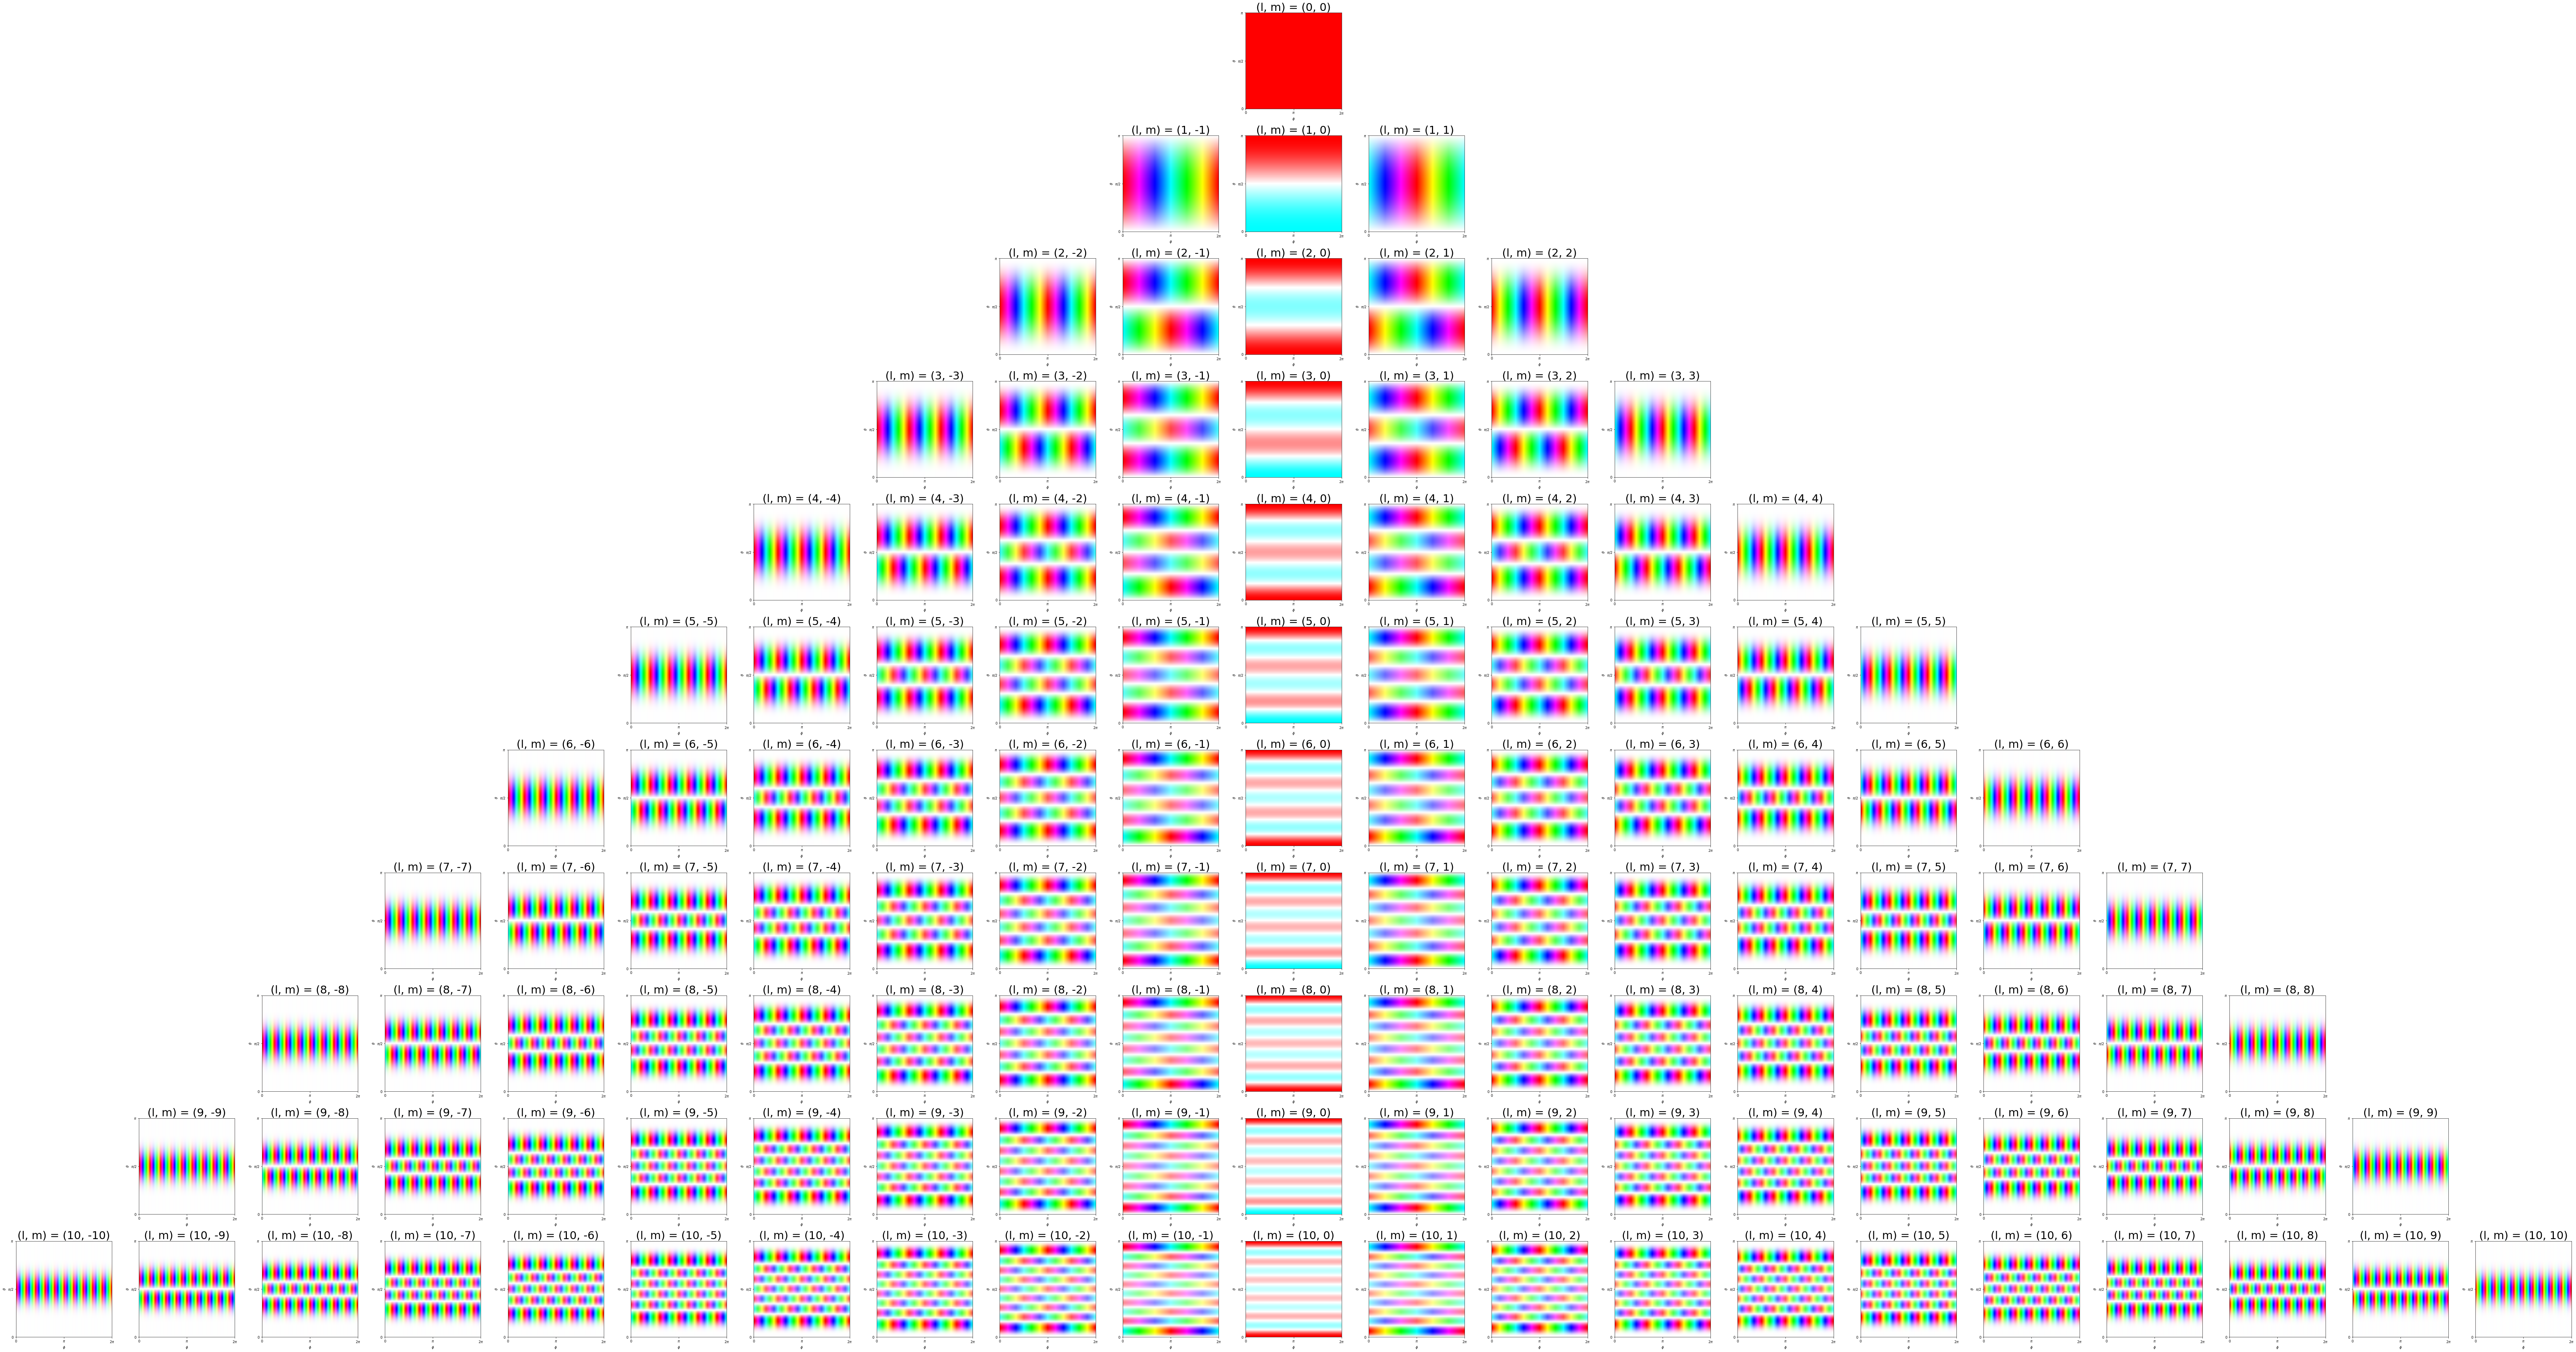

In [104]:

n_steps=101
lmax = 10
num_cols = 2 * lmax + 1
num_rows = lmax + 1
fig = plt.figure(figsize=(num_cols*5, num_rows*5))

for l in range(0, lmax + 1):
    for m in range(-l, l+1):
        print(l, m)
        row = l
        col = m + lmax
        idx = row * num_cols + col + 1
        ax = fig.add_subplot(num_rows, num_cols, idx)
        
        theta, phi = np.mgrid[0:np.pi:1j * n_steps, 0:2 * np.pi:1j * n_steps]
        sph_harm_array = sph_harm(m, l, phi, theta)
        color_map = complex_array_to_rgb(sph_harm_array)

        ax.imshow(color_map, extent=[0, 2, 0, 1], aspect=2)
        ax.grid(False)
        ax.set_xlabel('$\phi$')
        ax.set_ylabel('$\\theta$')
        ax.set_xticks([0, 1, 2])
        ax.set_xticklabels(labels=['0', '$\pi$', '$2\pi$'])
        ax.set_yticks([0, 0.5, 1])
        ax.set_yticklabels(labels=['0', '$\pi/2$', '$\pi$'])
        ax.set_title(f'(l, m) = ({l}, {m})', fontsize=32)
fig.set_tight_layout(True)
# plt.show()
print('saving')
fig.savefig('sph_harm_complex_2d.png')
print('saved')

In [99]:
fig.savefig('real_2d.png')

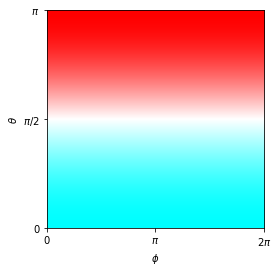

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [74]:
(l, m) = (1, 0)

n_steps = 251
theta, phi = np.mgrid[0:np.pi:1j * n_steps, 0:2 * np.pi:1j * n_steps]
sph_harm_array = real_sph_harm(m, l, phi, theta)
color_map = complex_array_to_rgb(sph_harm_array)

plt.imshow(color_map, extent=[0, 2, 0, 1], aspect=2)
plt.grid(False)
plt.xlabel('$\phi$')
plt.ylabel('$\\theta$')
plt.xticks([0, 1, 2], labels=['0', '$\pi$', '$2\pi$'])
plt.yticks([0, 0.5, 1], labels=['0', '$\pi/2$', '$\pi$'])

plt.show() 


sph_harm_mesh = get_sph_harm_mesh(l, m, n_steps=n_steps, 
                                  real_version=True, 
                                  radius_from_mag=True)
p = plot_sph_harm_mesh(sph_harm_mesh, show_grid=False, notebook=True)

sph_harm_mesh = get_sph_harm_mesh(l, m, n_steps=n_steps, 
                                  real_version=True, 
                                  radius_from_mag=False)
p = plot_sph_harm_mesh(sph_harm_mesh, show_grid=False, notebook=True)